# Perceptrons

Perceptrons are the fundamental building block of neural networks. They were introduced by Rosenblatt in 1960, <a href="https://ieeexplore.ieee.org/abstract/document/4066017">https://ieeexplore.ieee.org/abstract/document/4066017</a>.

The material in this notebook comes from the text <a href="https://link.springer.com/content/pdf/10.1007/978-3-319-94463-0.pdf">Neural Networks and Deep Learning</a> by Charu C. Aggarawal.

## What You'll Accomplish

In this notebook you'll:
<ul>
    <li>Gain familiarity with the inspiration for neural networks,</li>
    <li>See the formulation of the perceptron model,</li>
    <li>Familiarize yourself with the jargon of neural nets,</li>
    <li>Investigate how perceptrons are trained, and</li>
    <li>Learn the linear limitations of perceptrons.</li>
</ul>


In [1]:
## We'll import these, but I don't know how much 
## we'll use them

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## What is an Artificial Neural Network

Neural Networks is a technique that that loosely tries to mimic the network of neurons that make up brains. The idea being that we're trying to create learning algorithms that copy in some sense how humans learn (although I think this explanation is starting to fall out of vogue, <a href="https://www.hilarispublisher.com/open-access/are-neural-networks-imitations-of-mind-jcsb-1000179.pdf">https://www.hilarispublisher.com/open-access/are-neural-networks-imitations-of-mind-jcsb-1000179.pdf</a>).

The building blocks of the vast complex network of the brain is a single neuron, while the building blocks of an artificial neural network is a <i>perceptron</i>.

We start at the beginning with this simple building block and then expand into slightly more complex neural networks in Notebook 2.

## The Perceptron

We'll learn in the setting of a supervised learning problem, but be aware that neural nets can be applied in both unsupervised learning and supervised learning. In particular we'll focus on classification. While we've been using $0$ and $1$ for our binary classification, today we'll keep things spicy by using $-1$ and $1$ instead.

Suppose we have $n$ observations of $m$ features stored in $m$ $n$ by $1$ column vectors, $X_1, X_2, \dots, X_m$, and as we've done throughout the course let $X = \left(X_1 | X_2 | \dots |X_m\right)$, and we want to predict some target $y$. 

Let $\sigma$ be some nonlinear function from $\mathbb{R} \rightarrow \mathbb{R}$. For classification we take $\sigma = \text{sgn}$, the sign function, i.e. $\sigma(x) = 1$ if $x>0$ and $\sigma(x) = -1$ if $x<0$. In the language of neural networks we call $\sigma$ an activation function.

Recall in supervised learning we try and fit a model to approximate:
$$
y = f(X) + \epsilon.
$$

Perceptrons do this like so:
$$
\hat{y} = \sigma(w_1 X_1 + w_2  X_2 + \dots + w_m X_m) = \sigma(Xw),
$$
where in a potential abuse of notation I take $\sigma(Xw)$ to mean $\sigma$ applied to each of the $n$ entries of $Xw$, and $w=\left(w_1, w_2, \dots, w_m\right)^T$.

If I let $x=\left(x_1,x_2,\dots,x_m\right)$ denote a single observation then I can picture this like so.

<img src = "perceptron.png" style="width:60%"></img>

This sort of diagram is known as the <i>architecture</i> of the neural network.

The column of nodes are referred to as the input layer because these are the inputs into the perceptron, the output node has both $\Sigma$ and $\sigma$ because this is where our weighted sum ($\Sigma$) and nonlinear transformation ($\sigma$) occurs.  

Note the while we did not include a bias term this can easily be done, we just left it out for simplicity.


### Finding the $w$

So how do we find the weights?

First the weights are randomly selected. Then you use a single data point from the training set, $X^{(i)}$, and you calculate the error, $y^{(i)}-\hat{y^{(i)}}$.

You then update $w$ like so:
$$
w_{\text{update}} = w_{\text{current}} + \alpha (y^{(i)}-\hat{y^{(i)}}) X^{(i)} 
$$

$\alpha$ is the learning rate of the network.

The perceptron will cycle through all of the training points and continue to adjust the weights until it converges to a weight vector $w$. Each cycle through the training set is called an <i>epoch</i>. 

Typically the training points are chosen at random without replacement.

Note, that this can be performed small batches of training points, at which point the batches are chosen randomly without replacement.

Also note that the algorithm can be rewritten to work in parallel, <a href="http://www.cs.cmu.edu/~wcohen/10-605/parallel-perceptrons.pdf">http://www.cs.cmu.edu/~wcohen/10-605/parallel-perceptrons.pdf</a> and <a href="https://www.sciencedirect.com/science/article/pii/S0167819106800177">https://www.sciencedirect.com/science/article/pii/S0167819106800177</a>.


Also for a very simple example of training the perceptron check out this reference starting on page 10, <a href="http://hagan.okstate.edu/4_Perceptron.pdf">http://hagan.okstate.edu/4_Perceptron.pdf</a>.

## Practice

Let's now get some brief practice implementing a perceptron in `sklearn`. We won't spend much time here as you'll see at the end of the practice.

Here are the docs on `sklearn`'s implementation of perceptrons, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html</a>.

In [2]:
# Perceptron is stored in sklearn.linear_model
from sklearn.linear_model import Perceptron

Use the perceptron to build a setosa classifier on the iris data set. The data is prepared for you below.

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

# Get the data and the targets here 
# Grab Features
X = iris['data']

# Grab Targets
y = np.ones(np.shape(iris['target']))

# Reclassify as setosa and not setosa
y = np.where(iris['target']!=0, 0, y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=9)

In [18]:
## Code here
percep_clf = Perceptron(tol=1e-3)
percep_clf.fit(X_train,y_train)




Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
## Code here
percep_clf.score(X_train, y_train)



1.0

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

Now look at this simple example.

In [24]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y = np.array([1,-1,-1,1])

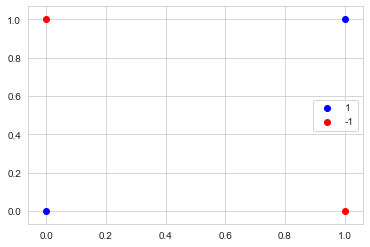

In [25]:
plt.scatter(X[y == 1,0],X[y == 1,1], c = 'b', label = "1")
plt.scatter(X[y == -1,0],X[y == -1,1], c = 'r', label = "-1")

plt.legend()

plt.show()

Don't worry about a train test split. Just try to build a perceptron classifier on this data set. What happens?

In [26]:
## Code here
percep_clf_silly = Perceptron(tol=1e-3)
percep_clf_silly.fit(X,y)



Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
## Code here

percep_clf_silly.score(X,y)


0.5

In [ ]:
## Code here




In [ ]:
## Code here




In [ ]:
## Code here




The final example of the Practice illustrates a huge limitation of the perceptron, it can't be used to calculate exclusive or, a key operation in logic.

More generally a single perceptron is not capable of separating data sets that are not separable by a hyperplane, much like the maximal margin classifier. This severely hurt interest in the method back in the 1950s and 60s, <a href="https://en.wikipedia.org/wiki/Perceptron">https://en.wikipedia.org/wiki/Perceptron</a>. 

However, if your data is linearly separable there is a proof that guarantees the perceptron will converge as well as an upper bound on the number of epochs it must endure to get there, see the previous wikipedia link.

The linear limitation is precisely why we now end our time with the perceptron and move on to more complicated neural network architectures.